In [8]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [ ]:
ds = pd.read_csv('penguins_size.csv')

In [36]:
ds2 = ds.dropna()
print(ds2.to_string())

       species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0       Adelie  Torgersen              39.1             18.7              181.0       3750.0    MALE
1       Adelie  Torgersen              39.5             17.4              186.0       3800.0  FEMALE
2       Adelie  Torgersen              40.3             18.0              195.0       3250.0  FEMALE
4       Adelie  Torgersen              36.7             19.3              193.0       3450.0  FEMALE
5       Adelie  Torgersen              39.3             20.6              190.0       3650.0    MALE
6       Adelie  Torgersen              38.9             17.8              181.0       3625.0  FEMALE
7       Adelie  Torgersen              39.2             19.6              195.0       4675.0    MALE
12      Adelie  Torgersen              41.1             17.6              182.0       3200.0  FEMALE
13      Adelie  Torgersen              38.6             21.2              191.0       3800.

In [18]:
ds2.dropna(inplace = True)
print(ds2.to_string())

       species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0       Adelie  Torgersen              39.1             18.7              181.0       3750.0    MALE
1       Adelie  Torgersen              39.5             17.4              186.0       3800.0  FEMALE
2       Adelie  Torgersen              40.3             18.0              195.0       3250.0  FEMALE
4       Adelie  Torgersen              36.7             19.3              193.0       3450.0  FEMALE
5       Adelie  Torgersen              39.3             20.6              190.0       3650.0    MALE
6       Adelie  Torgersen              38.9             17.8              181.0       3625.0  FEMALE
7       Adelie  Torgersen              39.2             19.6              195.0       4675.0    MALE
12      Adelie  Torgersen              41.1             17.6              182.0       3200.0  FEMALE
13      Adelie  Torgersen              38.6             21.2              191.0       3800.

C:\Users\mahab\AppData\Local\Temp\ipykernel_16780\2122527752.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds2.dropna(inplace = True)


In [37]:
print("Keys of penguin dataset: \n{}".format(ds2.keys()))

Keys of penguin dataset: 
Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')


In [4]:
print(ds['DESCR'] + "\n...")

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [22]:
print("Islands: {}".format(ds2['island']))

Islands: 0      Torgersen
1      Torgersen
2      Torgersen
4      Torgersen
5      Torgersen
         ...    
338       Biscoe
340       Biscoe
341       Biscoe
342       Biscoe
343       Biscoe
Name: island, Length: 334, dtype: object


In [24]:
print("Sex: \n{}".format(ds2['sex']))

Sex: 
0        MALE
1      FEMALE
2      FEMALE
4      FEMALE
5        MALE
        ...  
338    FEMALE
340    FEMALE
341      MALE
342    FEMALE
343      MALE
Name: sex, Length: 334, dtype: object


In [38]:
print("Type of data: {}".format(type(ds2['body_mass_g'])))

Type of data: <class 'pandas.core.series.Series'>


In [43]:
print("Shape of data: {}".format(ds2['culmen_length_mm'].shape))

Shape of data: (334,)


In [44]:
print("First five columns of data:\n{}".format(ds2['sex'][:5]))

First five columns of data:
0      MALE
1    FEMALE
2    FEMALE
4    FEMALE
5      MALE
Name: sex, dtype: object


In [32]:
print("Type of target: {}".format(type(ds['target'])))

Type of target: <class 'numpy.ndarray'>


In [33]:
print("Shape of target: {}".format(ds['target'].shape))

Shape of target: (178,)


In [34]:
print("Target:\n{}".format(ds['target']))

Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


## Training Dataset

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
ds2['data'], ds['target'], random_state=0)

KeyError: 'data'

In [36]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (133, 13)
y_train shape: (133,)


In [37]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (45, 13)
y_test shape: (45,)


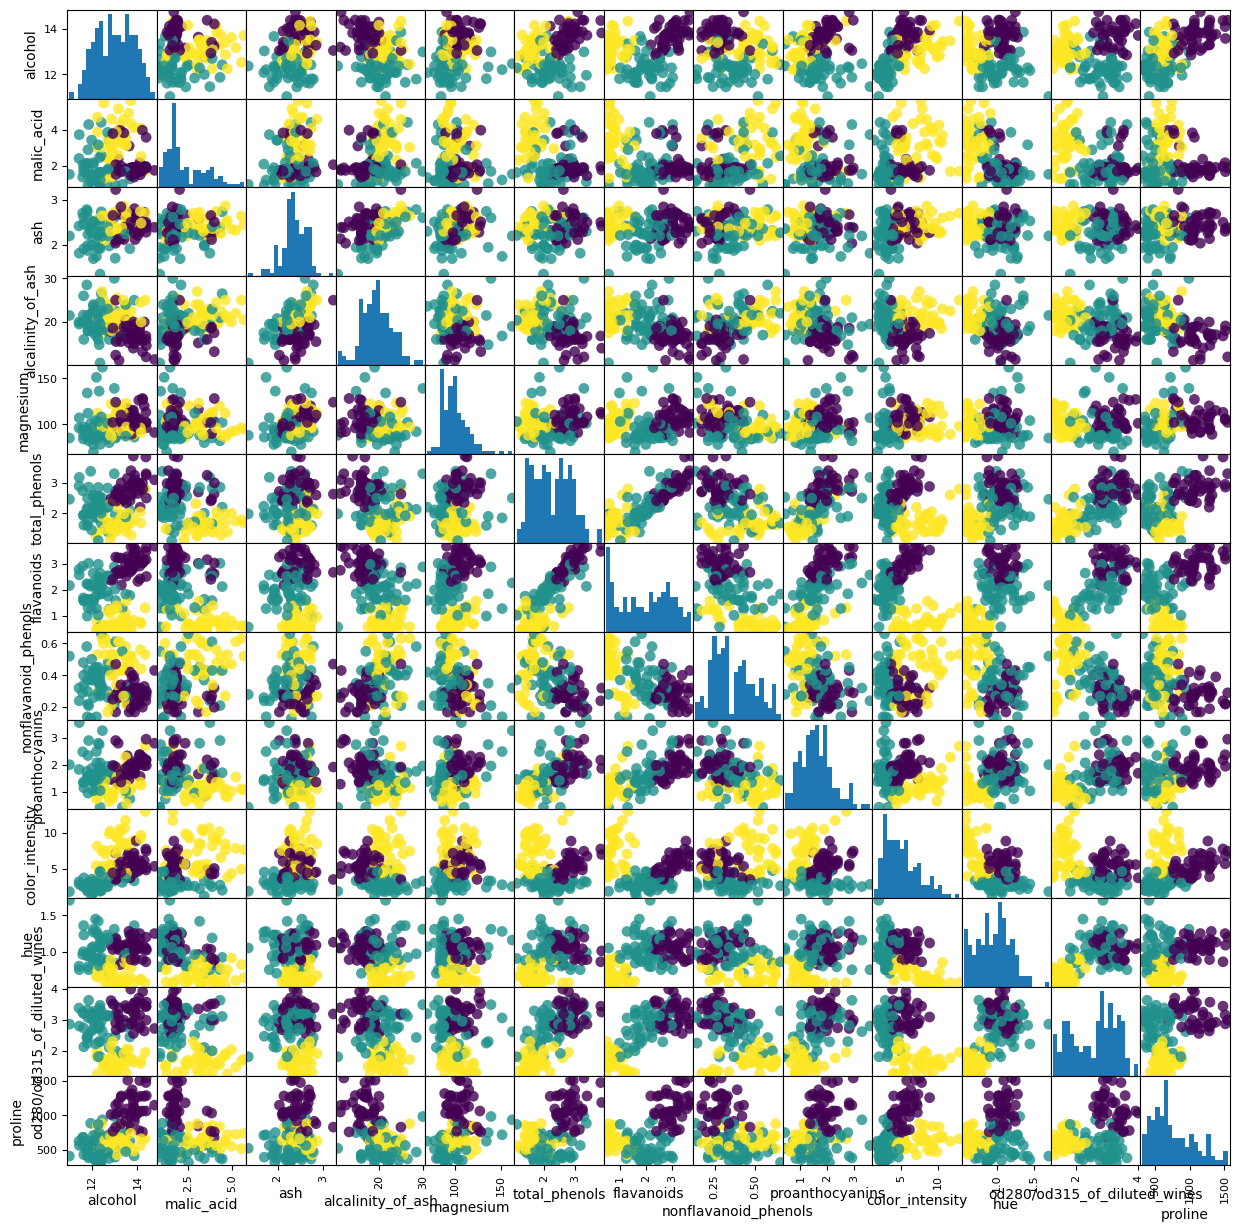

In [38]:
iris_dataframe = pd.DataFrame(X_train, columns=ds.feature_names)
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o',
                           hist_kwds={'bins': 20}, s=60, alpha=0.8, cmap='viridis')

plt.show()

In [45]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [44]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
metric_params=None, n_jobs=1, n_neighbors=1, p=2,
weights='uniform')

KNeighborsClassifier(n_jobs=1, n_neighbors=1)

In [18]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


In [49]:
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(
ds['target_names'][prediction]))

ValueError: X has 4 features, but KNeighborsClassifier is expecting 13 features as input.

In [48]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [0 1 1 0 1 1 0 2 1 1 0 1 0 2 1 1 0 0 1 0 1 0 1 1 0 1 1 1 2 2 0 0 2 0 0 0 2
 1 1 1 2 0 1 1 1]


In [ ]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

In [ ]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))